# Tarefa 2 - Exploração Inicial

## Importando Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from concat_df import concat_df

df = concat_df()

df

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year
0,2753519,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,411,2009
1,2753520,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,429,2009
2,2753521,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,109,2009
3,2753522,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,68,2009
4,2753523,0,2009-09-25 00:00:00,1772,PSB,SP,Abelardo Camarinha,2.418000e+12,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
251877,2050722,0,2017-06-29 00:00:00,2930,PR,RN,Zenaide Maia,2.012862e+12,Airline tickets,Cia Aérea - TAM,84,2017
251878,2050723,0,2017-07-06 00:00:00,2930,PR,RN,Zenaide Maia,2.012862e+12,Airline tickets,Cia Aérea - TAM,72,2017
251879,2050724,0,2017-07-06 00:00:00,2930,PR,RN,Zenaide Maia,2.012862e+12,Airline tickets,Cia Aérea - TAM,129,2017
251880,2050725,0,2017-08-10 00:00:00,2930,PR,RN,Zenaide Maia,2.012862e+12,Airline tickets,Cia Aérea - TAM,24,2017


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3014902 entries, 0 to 251881
Data columns (total 12 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   bugged_date                     int64  
 2   receipt_date                    object 
 3   deputy_id                       int64  
 4   political_party                 object 
 5   state_code                      object 
 6   deputy_name                     object 
 7   receipt_social_security_number  float64
 8   receipt_description             object 
 9   establishment_name              object 
 10  receipt_value                   int64  
 11  year                            int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 299.0+ MB


Das colunas que possuímos, as seguintes contém dados numéricos:

- Unnamed: 0 (Que na realidade aparenta ser uma de índice)
- bugged_date (Contém somente valores booleanos, 0 ou 1)
- deputy_id (Identificador do deputado(a))
- receipt_social_security_number (Aparenta ser o CPF ou CNPJ de quem emitiu o recibo)
- receipt_value (Valor do recibo)
- year (Ano)

### Cálculo das medidas de centralidade e dispersão dos valores disponíveis no dataset
O calculo destas medidas será feito nas colunas numéricas.

In [3]:
num_columns = ['Unnamed: 0', 'bugged_date', 'deputy_id', 'receipt_social_security_number', 'receipt_value', 'year']

for column in num_columns:
    print('(Coluna %s)\nMédia = %.3f Mediana = %.3f Desvio padrão = %.3f\n' % (column, df[column].mean(), df[column].median(), df[column].std()))

(Coluna Unnamed: 0)
Média = 1507450.500 Mediana = 1507450.500 Desvio padrão = 870327.385

(Coluna bugged_date)
Média = 0.016 Mediana = 0.000 Desvio padrão = 0.127

(Coluna deputy_id)
Média = 1869.101 Mediana = 1882.000 Desvio padrão = 701.475

(Coluna receipt_social_security_number)
Média = 13726644826123.602 Mediana = 7423935000120.000 Desvio padrão = 20572449800984.996

(Coluna receipt_value)
Média = 579.157 Mediana = 142.000 Desvio padrão = 1925.418

(Coluna year)
Média = 2012.989 Mediana = 2013.000 Desvio padrão = 2.460



Como visto anteriormente, a coluna **Unnamed: 0** e **deputy_id** são identificadores e por isso as medidas calculadas não servem para tirar conclusões sobre os dados. A coluna **receipt_social_security_number** contém valores grandes e representam CPF ou CNPJ, e também a utilização dessas medidas não permite tirar conclusões. 

Pela coluna **receipt_value**, temos que a média é R\\$ 579,16 e a mediana R\\$ 142,00, enquanto que, o desvio padrão é de R\\$ 1925,42, tais métricas levam a entender que existem muitas notas de baixo valor o que acaba levar a mediana a ter valores bem inferiores a média, enquanto que, há quantidade considerável de notas com valores relativamente grandes, o que acaba a levar a média para valores muito maiores que a mediana, como resultado os valores devem estar consideravelmente dispersos, uma vez que o desvio padrão está bastante alto.

Pela coluna **year**, temos uma mediana naquilo que se espera para o caso de uma distribuição uniforme, o que seria 2013, uma vez que os dados estão entre 2009 e 2017, contudo, pela média, percebe-se que há mais dados antes que 2013 do que depois, porém sem grandes desequilíbrios, uma vez que média é levemente menor que a mediana, o desvio padrão indica uma certa dispersão dos valores deste ano, mas deve ser pela distribuição dos dados ser próxima de algo uniforme.

Por fim, a coluna **bugged_date** contém apenas valores em 0 e 1, a média e a mediana nos diz que tem mais valores 0 do que 1, uma vez que os valores estão próximos de 0 (sendo 0 para a mediana), já o desvio padrão indica uma dispersão dos dados maior que a média, mas vale salientar que como os dados para essa coluna são 0 **ou** 1 tal métrica pode enganar.

### Boxplots para os dados disponíveis nos datasets

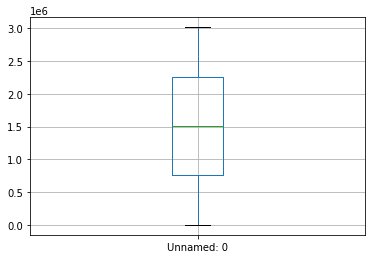

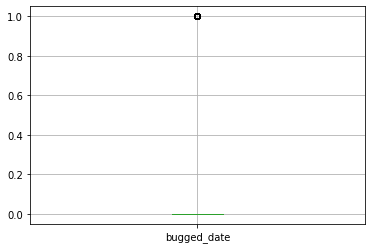

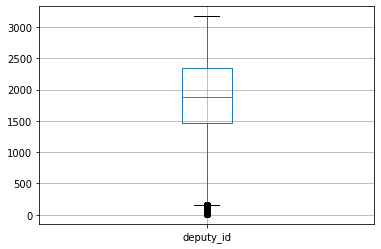

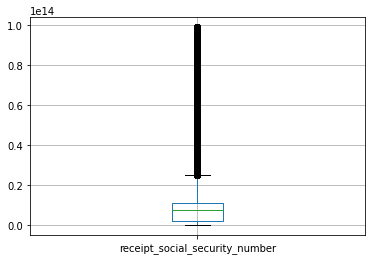

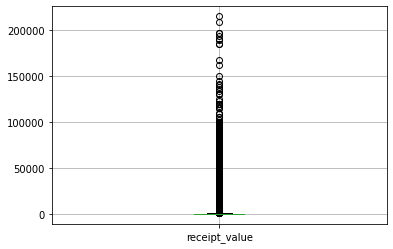

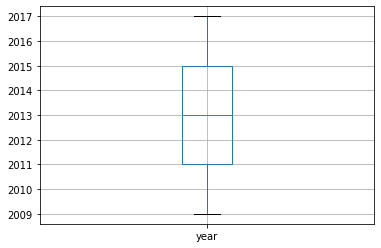

In [4]:
for column in num_columns:
    df.boxplot(column=column)
    plt.show()

Os boxplots acima confirmam, em certo nível, hipóteses levantadas anteriormente para a coluna **receipt_value**, **year** e **bugged_date**. No caso de **bugged_date** todos os valores iguais a 1 são identificados como outliers pelo boxplot.